In [1]:
import pandas as pd
import numpy as np
from math import pi
from datetime import date, timedelta

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import Range1d, LinearAxis, Legend
from bokeh.models import SingleIntervalTicker, DatetimeTicker, NumeralTickFormatter, DatetimeTickFormatter
output_notebook()

Loading BokehJS ...

In [2]:
# Not needed unless saving for github

import IPython.display as ipd
from bokeh.io import export_png
import os

def show(p):
    filename = 'temp_img.png'
    ipd.display(ipd.Image(export_png(p, filename=filename)))
    os.remove(filename)

In [3]:
# Create data
df = pd.DataFrame()
df['# of All Fruits Sold'] = np.random.randint(low=1200, high=2501, size=1000)
df['% Apples'] = np.random.uniform(low=0.5, high=1.0, size=1000)
df['# of Apples Sold'] = df.apply(lambda row: int(row['# of All Fruits Sold'] * row['% Apples']), axis=1)

df['Month'] = np.random.randint(low=1, high=13, size=1000)
df = df.groupby('Month').sum().reset_index()
df['% Apples'] = df['# of Apples Sold'] / df['# of All Fruits Sold']
df

,Month,# of All Fruits Sold,% Apples,# of Apples Sold
0,1,182781,0.758722,138680
1,2,128758,0.776449,99974
2,3,145248,0.753277,109412
3,4,175767,0.744332,130829
4,5,151460,0.747933,113282
5,6,162215,0.757698,122910
6,7,150881,0.754893,113899
7,8,133694,0.745239,99634
8,9,166284,0.730197,121420
9,10,164608,0.740310,121861


In [4]:
def show_stacked_bars_and_line(df, col_x, col_bar_bottom, col_bar_full, col_line, 
                               label_bar_diff=None, title=None, x_is_date=False):    
    # Create foundation
    title = '' if title is None else title
    
    p = figure(plot_width=980, plot_height=600, title=title,
               y_range=(0, df[col_bar_full].max()*1.2))
    
    p.title.text_font_size = '20pt'

    # Add bars
    label_bar_diff = ('Diff. with ' + col_bar_full) if (label_bar_diff is None) else label_bar_diff
    df[label_bar_diff] = df[col_bar_full] - df[col_bar_bottom]
        
    bar_labels = [col_bar_bottom, label_bar_diff]
    bars_data = {col_x : df[col_x], 
                 col_bar_bottom: df[col_bar_bottom], 
                 label_bar_diff: df[label_bar_diff]}

    bars = p.vbar_stack(bar_labels, x=col_x, source=bars_data, color=['#687E5A', '#C0D9AF'], 
                        width=0.5 if not x_is_date else timedelta(days=1)*0.8)
    
    # Add line
    p.extra_y_ranges = {'extra_range': Range1d(start=0, end=df[col_line].max()*1.2)}
    line = p.line(df[col_x], df[col_line], color='red', line_width=5, 
                  y_range_name='extra_range')

    # Tickers
    p.xaxis.visible = None
    p.yaxis.visible = None
    
    if not x_is_date:
        x_axis = LinearAxis(axis_label=col_x, 
                            ticker=SingleIntervalTicker(interval=1, num_minor_ticks=0))
    else:
        x_axis = LinearAxis(axis_label=col_x, major_label_orientation = pi/4,
                            ticker=DatetimeTicker(), 
                            formatter=DatetimeTickFormatter(days='%B %d, %Y'))
    
    y_axis_left = LinearAxis(axis_label='# Sold', 
                             ticker=SingleIntervalTicker(interval=20000, num_minor_ticks=4), 
                             formatter=NumeralTickFormatter(format=',000'))
    
    y_axis_right = LinearAxis(axis_label=col_line, y_range_name='extra_range', 
                              ticker=SingleIntervalTicker(interval=0.1, num_minor_ticks=5), 
                              formatter=NumeralTickFormatter(format='0.0'))

    p.add_layout(x_axis, 'below')
    p.add_layout(y_axis_left, 'left')    
    p.add_layout(y_axis_right, 'right')
    
    # Legend
    legend = Legend(items=[(bar_labels[0], [bars[0]]), (bar_labels[1], [bars[1]]), (col_line, [line])], 
                    orientation='horizontal', location='top_left')
    p.add_layout(legend)
    
    show(p)

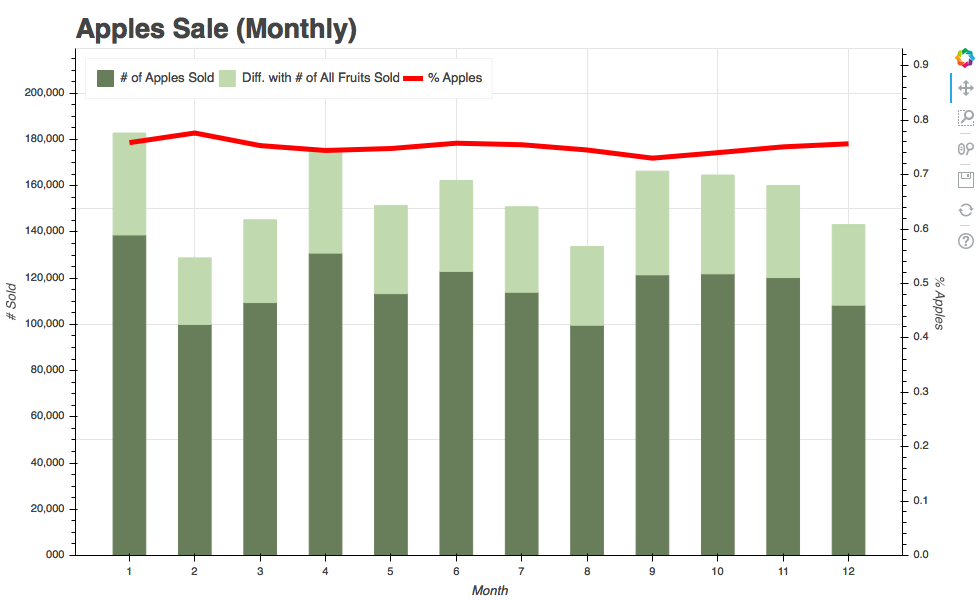

In [5]:
show_stacked_bars_and_line(df, col_x='Month', 
                           col_bar_bottom='# of Apples Sold', col_bar_full='# of All Fruits Sold', 
                           col_line='% Apples', 
                           title='Apples Sale (Monthly)')

In [6]:
# Create data
start_date = date(1983, 7, 1)
end_date = date(1983, 9, 30)
n_days = (end_date - start_date).days

df = pd.DataFrame()
df['# of All Fruits Sold'] = np.random.randint(low=1200, high=2501, size=n_days*100)
df['% Apples'] = np.random.uniform(low=0.5, high=1.0, size=n_days*100)
df['# of Apples Sold'] = df.apply(lambda row: int(row['# of All Fruits Sold'] * row['% Apples']), axis=1)

df['Date'] = np.random.randint(low=0, high=n_days, size=n_days*100)
df['Date'] = df['Date'].apply(lambda cell: start_date + timedelta(days=int(cell)))
df = df.groupby('Date').sum().reset_index()
df['% Apples'] = df['# of Apples Sold'] / df['# of All Fruits Sold']
df.head()

,Date,# of All Fruits Sold,% Apples,# of Apples Sold
0,1983-07-01,165545,0.751687,124438
1,1983-07-02,168189,0.721260,121308
2,1983-07-03,192723,0.737141,142064
3,1983-07-04,175534,0.747160,131152
4,1983-07-05,158933,0.748259,118923


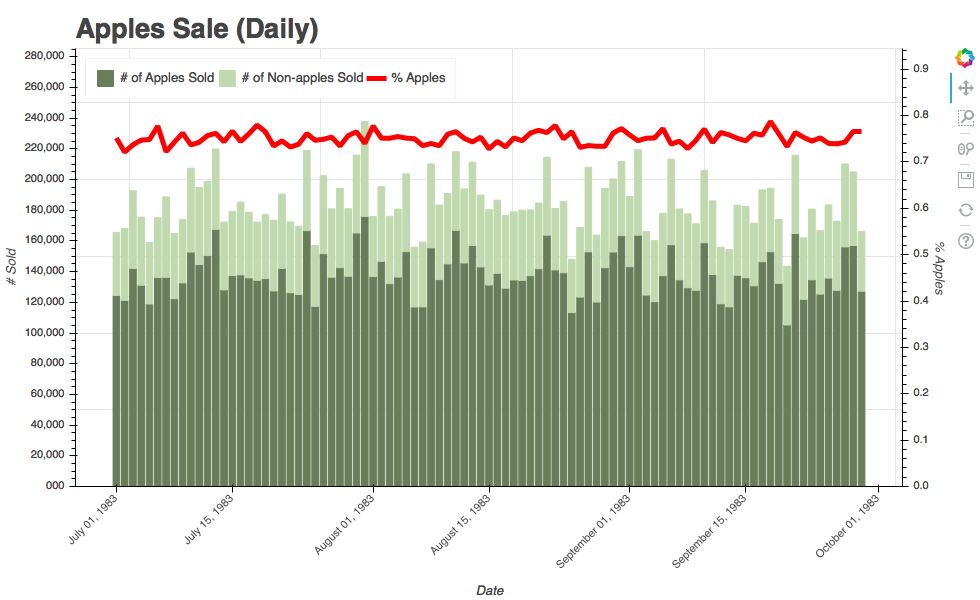

In [7]:
show_stacked_bars_and_line(df, col_x='Date',  
                           col_bar_bottom='# of Apples Sold', col_bar_full='# of All Fruits Sold', 
                           col_line='% Apples', 
                           label_bar_diff='# of Non-apples Sold', title='Apples Sale (Daily)', x_is_date=True)

# References
- Bar chart: https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html
- Custom axis: https://bokeh.pydata.org/en/latest/docs/reference/models/axes.html#bokeh.models.axes.LinearAxis
- Tickers: https://bokeh.pydata.org/en/latest/docs/reference/models/tickers.html
- Date x-axis, bar width: https://stackoverflow.com/questions/50285405/bokeh-the-widths-of-vertical-bars-doesnt-change